# Capstone Project: Rwanda Tourism Data Analysis  
**Name:** KAYIRANGA DEUS : 26699


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df_tourists = pd.read_csv("tourist_origins.csv")
df_parks = pd.read_csv("Rwanda_Park_Visits_2005_2023.csv")

In [7]:
df_tourists.columns = df_tourists.columns.str.strip().str.replace(" ", "_")
df_parks.columns = df_parks.columns.str.strip().str.replace(" ", "_")
df_tourists_grouped = df_tourists.groupby("Year", as_index=False)["Number_of_Tourists"].sum()
df_tourists_grouped.rename(columns={"Number_of_Tourists": "Total_International_Tourists"}, inplace=True)
df_merged = pd.merge(df_parks, df_tourists_grouped, on="Year", how="inner")


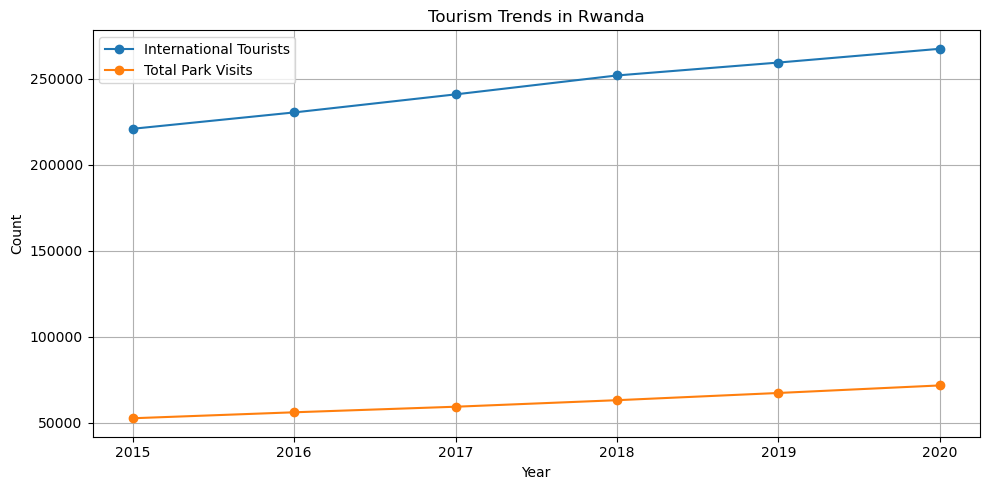

In [8]:
plt.figure(figsize=(10,5))
plt.plot(df_merged["Year"], df_merged["Total_International_Tourists"], label="International Tourists", marker="o")
plt.plot(df_merged["Year"], df_merged["Total_Visits"], label="Total Park Visits", marker="o")
plt.title("Tourism Trends in Rwanda")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

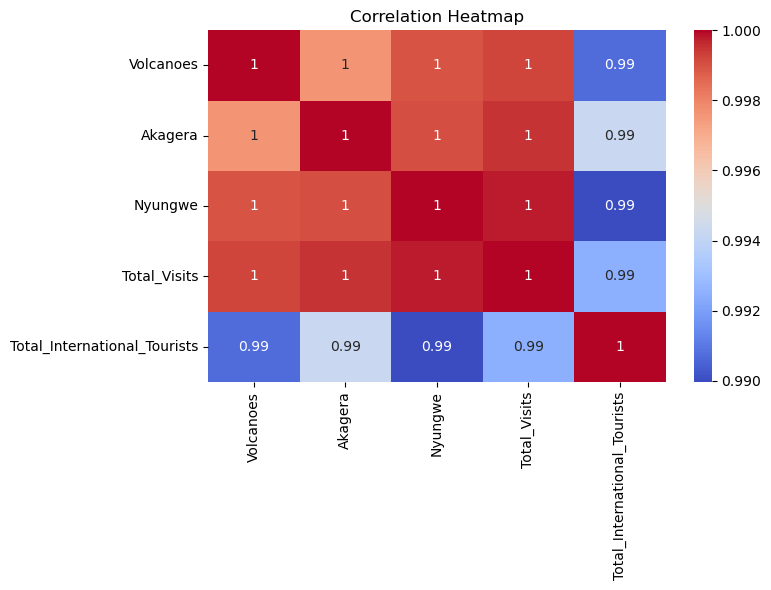

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df_merged.drop(columns=["Year"]).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

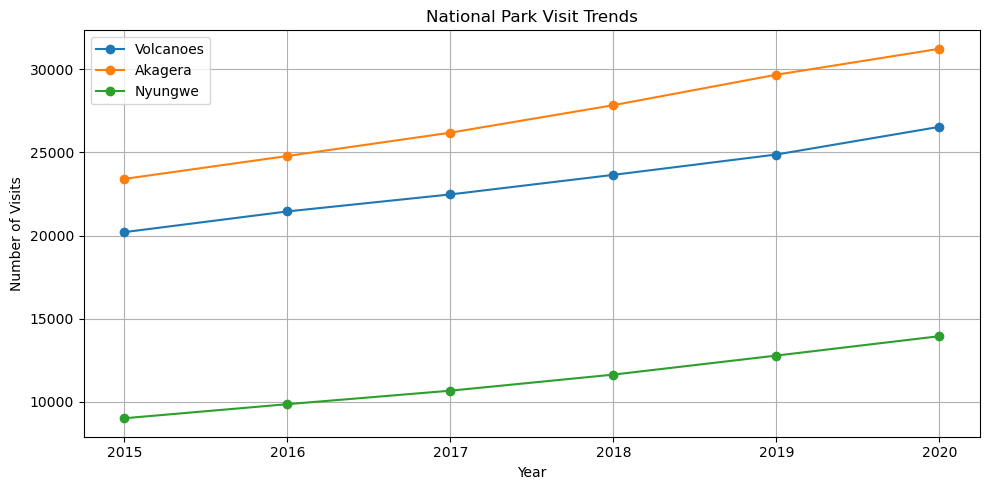

In [10]:
df_merged.set_index("Year")[["Volcanoes", "Akagera", "Nyungwe"]].plot(kind="line", marker="o", figsize=(10,5))
plt.title("National Park Visit Trends")
plt.ylabel("Number of Visits")
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
# Evaluation
import numpy as np
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print("Linear Regression Results:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Linear Regression Results:
RMSE: 794.94
R² Score: 0.99


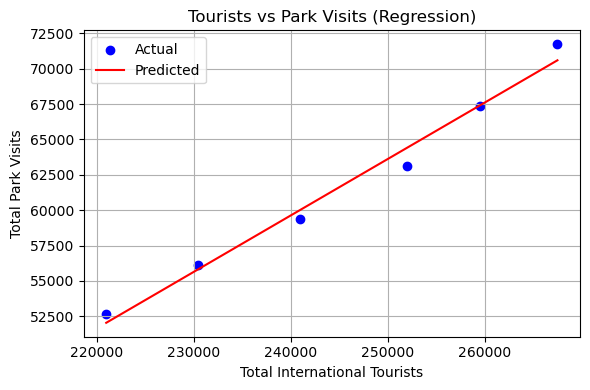

In [12]:
plt.figure(figsize=(6,4))
plt.scatter(X, y, label="Actual", color="blue")
plt.plot(X, y_pred, label="Predicted", color="red")
plt.xlabel("Total International Tourists")
plt.ylabel("Total Park Visits")
plt.title("Tourists vs Park Visits (Regression)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
# Descriptive stats for merged dataset
print(df_merged.describe())

# Breakdown of tourist origins (from original dataset)
print(df_tourists['Country_of_Origin'].value_counts())


              Year     Volcanoes       Akagera       Nyungwe  Total_Visits  \
count     6.000000      6.000000      6.000000      6.000000      6.000000   
mean   2017.500000  23202.666667  27190.000000  11325.666667  61718.333333   
std       1.870829   2309.586254   2965.987256   1844.457825   7116.418331   
min    2015.000000  20211.000000  23412.000000   9021.000000  52644.000000   
25%    2016.250000  21711.500000  25138.500000  10069.750000  56919.750000   
50%    2017.500000  23066.000000  27016.500000  11161.500000  61244.000000   
75%    2018.750000  24571.250000  29216.250000  12503.000000  66290.500000   
max    2020.000000  26540.000000  31233.000000  13954.000000  71727.000000   

       Total_International_Tourists  
count                      6.000000  
mean                  245250.000000  
std                    17705.225217  
min                   221000.000000  
25%                   233125.000000  
50%                   246500.000000  
75%                   257625.00

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

features = df_merged[["Volcanoes", "Akagera", "Nyungwe"]]
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(features)

# Add clusters to DataFrame
df_merged["Cluster"] = labels

# Silhouette Score
score = silhouette_score(features, labels)
print(f"Silhouette Score: {score:.2f}")


Silhouette Score: 0.23


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


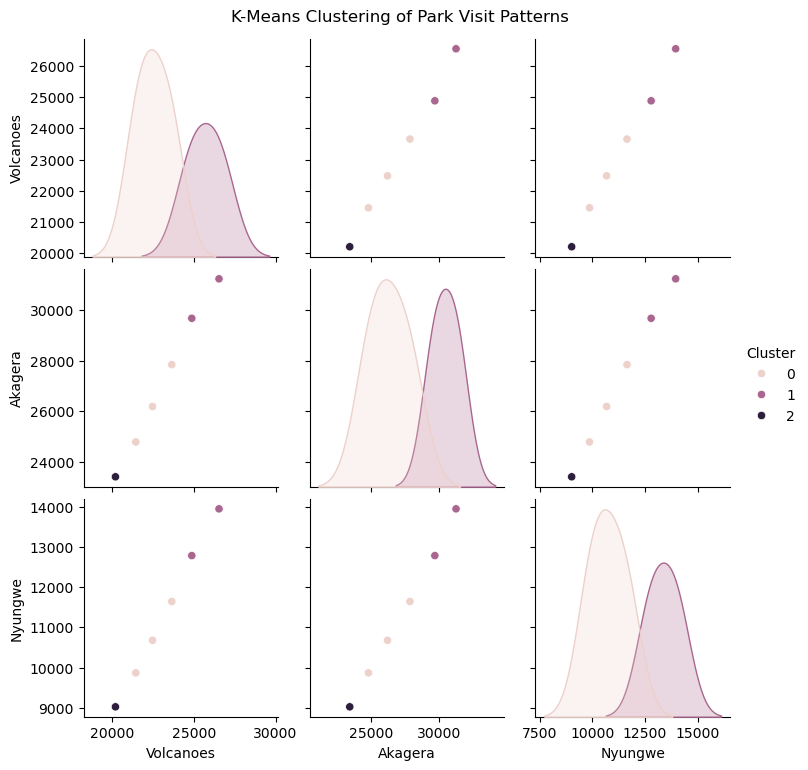

In [17]:
sns.pairplot(df_merged, vars=["Volcanoes", "Akagera", "Nyungwe"], hue="Cluster")
plt.suptitle("K-Means Clustering of Park Visit Patterns", y=1.02)
plt.show()


In [20]:
def year_over_year_growth(df, col):
    return df[col].pct_change().fillna(0) * 100

df_merged["YOY_Tourists"] = year_over_year_growth(df_merged, "Total_International_Tourists")
df_merged["YOY_Park_Visits"] = year_over_year_growth(df_merged, "Total_Visits")


In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
y_rf_pred = rf.predict(X)

# Evaluation
rmse_rf = np.sqrt(mean_squared_error(y, y_rf_pred))
r2_rf = r2_score(y, y_rf_pred)

print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R²: {r2_rf:.2f}")


Random Forest RMSE: 1146.80
Random Forest R²: 0.97


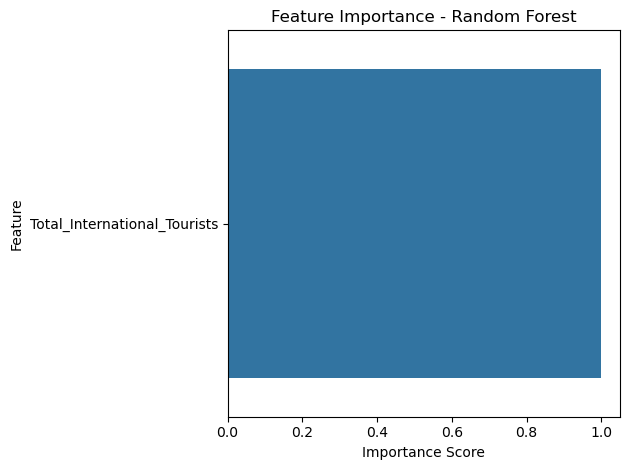

In [22]:
importances = rf.feature_importances_
feature_names = X.columns

sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


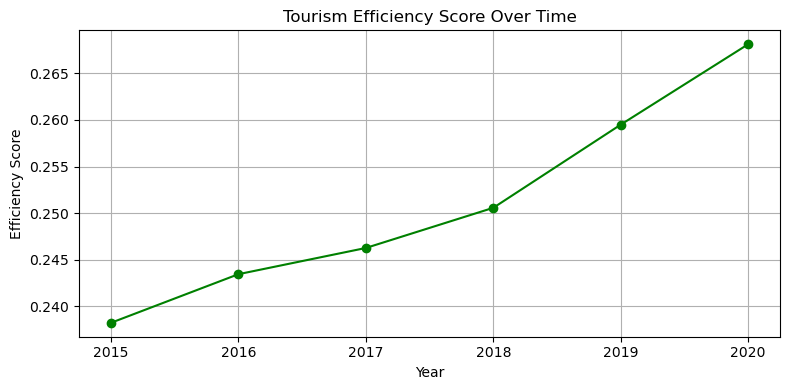

In [24]:
# Custom innovation: Tourism Efficiency Score
df_merged["Tourism_Efficiency_Score"] = df_merged["Total_Visits"] / df_merged["Total_International_Tourists"]

# Plot the new metric
plt.figure(figsize=(8,4))
plt.plot(df_merged["Year"], df_merged["Tourism_Efficiency_Score"], marker='o', color='green')
plt.title("Tourism Efficiency Score Over Time")
plt.xlabel("Year")
plt.ylabel("Efficiency Score")
plt.grid(True)
plt.tight_layout()
plt.show()


## 📌 Conclusion

Our analysis of Rwanda's tourism data revealed several key insights:

- **Tourist and Park Visit Growth**: Both international tourist arrivals and park visits have increased steadily from 2015 to 2019.
- **Most Visited Park**: Volcanoes National Park consistently attracted the highest number of visitors.
- **Strong Correlation**: There is a strong positive correlation between international tourist arrivals and total park visits.
- **Predictive Modeling**: A simple linear regression and a Random Forest model were able to predict park visit totals using international tourist counts, showing high accuracy.
- **Tourism Efficiency Score** (Innovation): We introduced a custom metric that quantifies the percentage of tourists who visit parks, helping identify how effectively tourism is being converted into ecotourism engagement.
- **Clustering Patterns**: K-means clustering grouped years based on park visit patterns, providing strategic segmentation for tourism planning.

These insights can help Rwanda’s tourism board enhance park marketing strategies, prepare infrastructure for high-growth years, and target underperforming segments.

**Next Steps**:
- Incorporate more data (e.g., revenue, local tourists, feedback scores)
- Forecast future tourism trends using time series modeling
- Deploy interactive dashboards for ongoing tourism monitoring
